# Final Project

In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be `price` column. **Do not forget, this is a Classification problem!**

## Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

## Steps
- Read the `diamonds.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification). *Hint: Is there any imbalanced problem in the label column?*
- Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Atalay Gürel</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read csv
X_df = pd.read_csv('diamonds.csv')
X_df

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [55]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values

In [3]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [4]:
#check duplicate samples
X_df.duplicated().sum()

0

Create new features named as "volume" using "x,y,z" columns
This will reduce the number of features

In [5]:
X_df['volume'] = X_df['x']*X_df['y']*X_df['z']
X_df.drop(['x','y','z'],axis=1,inplace=True)
X_df

,index,carat,cut,color,clarity,depth,table,price,volume
0,1,0.23,Ideal,E,SI2,61.5,55.0,Very Low,38.202030
1,2,0.21,Premium,E,SI1,59.8,61.0,Very Low,34.505856
2,3,0.23,Good,E,VS1,56.9,65.0,Very Low,38.076885
3,4,0.29,Premium,I,VS2,62.4,58.0,Very Low,46.724580
4,5,0.31,Good,J,SI2,63.3,58.0,Very Low,51.917250
...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,Very Low,115.920000
53936,53937,0.72,Good,D,SI1,63.1,55.0,Very Low,118.110175
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,Very Low,114.449728
53938,53939,0.86,Premium,H,SI2,61.0,58.0,Very Low,140.766120


In [8]:
X_df["volume"].describe()
# as we can see here max volume is so high, so we have to remove some volume values

count    53940.000000
mean       129.849403
std         78.245262
min          0.000000
25%         65.136830
50%        114.808572
75%        170.842451
max       3840.598060
Name: volume, dtype: float64

In [6]:
# remove outliers above 1000 volume variables
X_df = X_df[X_df['volume']<1000]
X_df["volume"].describe()

count    53939.000000
mean       129.780608
std         76.597278
min          0.000000
25%         65.136830
50%        114.808572
75%        170.841804
max        838.502400
Name: volume, dtype: float64

# Exploratory Data Analysis

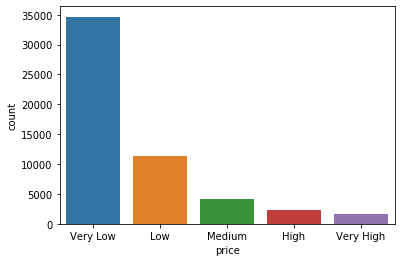

In [3]:
# Our label Distribution (countplot)


Text(0.5, 1.0, 'Diamond Volume')

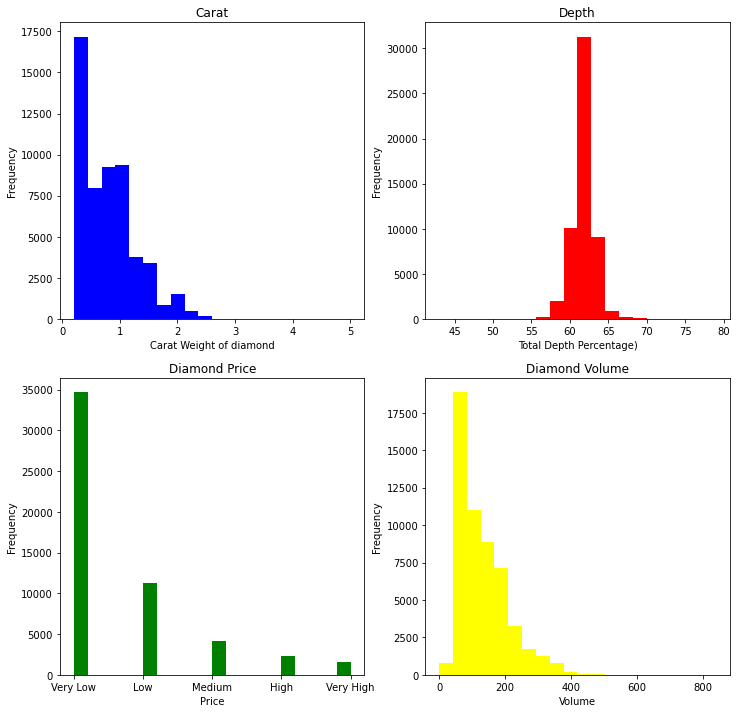

In [7]:
plt.figure(figsize=[12,12])

# First subplot showing the diamond carat weight distribution
plt.subplot(221)
plt.hist(X_df['carat'],bins=20,color='blue')
plt.xlabel('Carat Weight of diamond')
plt.ylabel('Frequency')
plt.title('Carat')

# Second subplot showing the diamond depth distribution
plt.subplot(222)
plt.hist(X_df['depth'],bins=20,color='red')
plt.xlabel('Total Depth Percentage)')
plt.ylabel('Frequency')
plt.title('Depth')

# Third subplot showing the diamond price distribution
plt.subplot(223)
plt.hist(X_df['price'],bins=20,color='green')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Diamond Price')

# Fourth subplot showing the diamond volume distribution
plt.subplot(224)
plt.hist(X_df['volume'],bins=20,color='yellow')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Diamond Volume')

Distrubiton of depth is usually between 60-65%. Carat and volume are look similar graphs. 

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


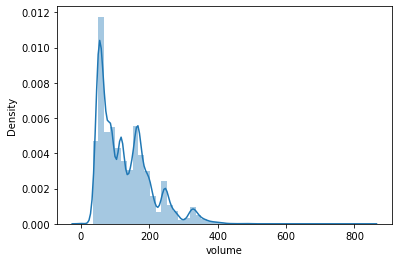

In [11]:
ax = sns.distplot(pd.Series(X_df["volume"], name="volume"))

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split dataset into train and test sets. (0.7/0.3)

In [8]:
#check duplicate samples
X_df.duplicated().sum()

0

In [9]:
# convert object value to numerical data
copyX = X_df

copyX['cut'] = copyX['cut'].apply(lambda x: 1 if x=='Fair' else(2 if x=='Good' else(3 if x=='Very Good' else(4 if x=='Premium' else 5))))

copyX['color'] = copyX['color'].apply(lambda x: 1 if x=='J' else(2 if x=='I' else(3 if x=='H' else(4 if x=='G' else(5 if x=='F' else(6 if x=='E' else 7))))))

copyX['clarity'] = copyX['clarity'].apply(lambda x: 1 if x=='I1' else(2 if x=='SI2'
                                          else(3 if x=='SI1'
                                          else(4 if x=='VS2'
                                          else(5 if x=='VS1'
                                          else(6 if x=='WS2'
                                          else 7 if x=='WS1' else 8))))))
copyX

<ipython-input-9-3fe57c2803f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copyX['cut'] = copyX['cut'].apply(lambda x: 1 if x=='Fair' else(2 if x=='Good' else(3 if x=='Very Good' else(4 if x=='Premium' else 5))))
<ipython-input-9-3fe57c2803f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copyX['color'] = copyX['color'].apply(lambda x: 1 if x=='J' else(2 if x=='I' else(3 if x=='H' else(4 if x=='G' else(5 if x=='F' else(6 if x=='E' else 7))))))
<ipython-input-9-3fe57c2803f7>:8: SettingWithCopyWarning

,index,carat,cut,color,clarity,depth,table,price,volume
0,1,0.23,5,6,2,61.5,55.0,Very Low,38.202030
1,2,0.21,4,6,3,59.8,61.0,Very Low,34.505856
2,3,0.23,2,6,5,56.9,65.0,Very Low,38.076885
3,4,0.29,4,2,4,62.4,58.0,Very Low,46.724580
4,5,0.31,2,1,2,63.3,58.0,Very Low,51.917250
...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,5,7,3,60.8,57.0,Very Low,115.920000
53936,53937,0.72,2,7,3,63.1,55.0,Very Low,118.110175
53937,53938,0.70,3,7,3,62.8,60.0,Very Low,114.449728
53938,53939,0.86,4,3,2,61.0,58.0,Very Low,140.766120


In [11]:
#Encoding the label
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
copyX["Label"] = label_encoder.fit_transform(copyX["price"]) 
copyX.head()

<ipython-input-11-117cfbc328b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copyX["Label"] = label_encoder.fit_transform(copyX["price"])


,index,carat,cut,color,clarity,depth,table,price,volume,Label
0,1,0.23,5,6,2,61.5,55.0,Very Low,38.202030,4
1,2,0.21,4,6,3,59.8,61.0,Very Low,34.505856,4
2,3,0.23,2,6,5,56.9,65.0,Very Low,38.076885,4
3,4,0.29,4,2,4,62.4,58.0,Very Low,46.724580,4
4,5,0.31,2,1,2,63.3,58.0,Very Low,51.917250,4


In [12]:
copyX["Label"].value_counts()

4    34663
1    11271
2     4109
0     2307
3     1589
Name: Label, dtype: int64

In [13]:
# Checking encoded labels
categories = list(label_encoder.inverse_transform([0, 1, 2,3,4]))
categories

['High', 'Low', 'Medium', 'Very High', 'Very Low']

In [14]:
# Dropping unnecessary columns
clases = list(set(copyX.price))
copyX.drop(["index","price"], axis=1, inplace=True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
copyX

,carat,cut,color,clarity,depth,table,volume,Label
0,0.23,5,6,2,61.5,55.0,38.202030,4
1,0.21,4,6,3,59.8,61.0,34.505856,4
2,0.23,2,6,5,56.9,65.0,38.076885,4
3,0.29,4,2,4,62.4,58.0,46.724580,4
4,0.31,2,1,2,63.3,58.0,51.917250,4
...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,115.920000,4
53936,0.72,2,7,3,63.1,55.0,118.110175,4
53937,0.70,3,7,3,62.8,60.0,114.449728,4
53938,0.86,4,3,2,61.0,58.0,140.766120,4


<AxesSubplot:>

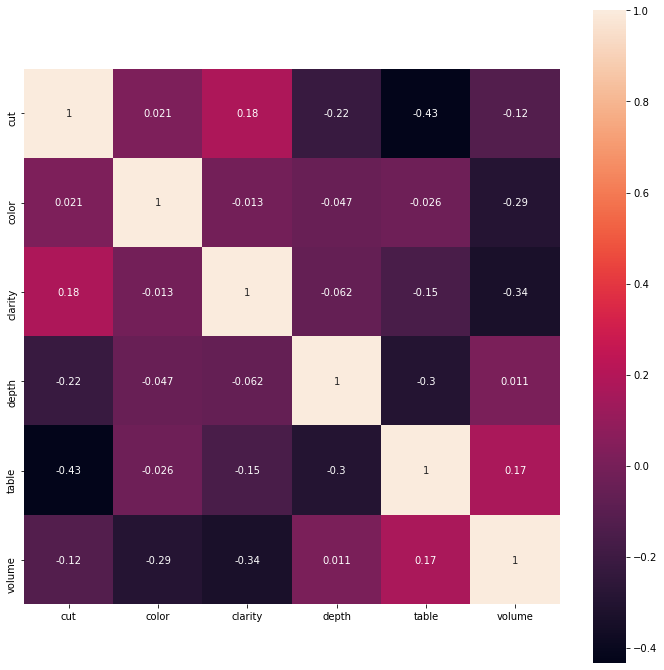

In [16]:
plt.figure(figsize=(12, 12))
correlation = copyX.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
sns.heatmap(correlation, vmax=1, annot=True,square=True)

In [17]:
# Locate features and label
X, y = copyX.iloc[: , :-1], copyX.iloc[: , -1]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [19]:
y_train.value_counts()

4    24211
1     7919
2     2907
0     1585
3     1135
Name: Label, dtype: int64

In [20]:
y_test.value_counts()

4    10452
1     3352
2     1202
0      722
3      454
Name: Label, dtype: int64

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.8667002145297561
Accuracy of test: 0.864046471387962


In [22]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.43      0.37      0.40       722
           1       0.78      0.83      0.80      3352
           2       0.62      0.51      0.56      1202
           3       0.50      0.66      0.57       454
           4       0.97      0.96      0.96     10452

    accuracy                           0.86     16182
   macro avg       0.66      0.67      0.66     16182
weighted avg       0.86      0.86      0.86     16182



As we can see recall values of label "0","2","3" are so low. But label "4" recall is high.
Because our dataset has lots of sample "4". 
Labels "0,2,3" are not enough to train like label "4". So our model couldn't train. It is a underfitting problem.
We have to fix these imbalanced data.

In [23]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.657309732356652
Recall = 0.666530634143575
Accuracy = 0.864046471387962
F1 Score = 0.6578630087578653


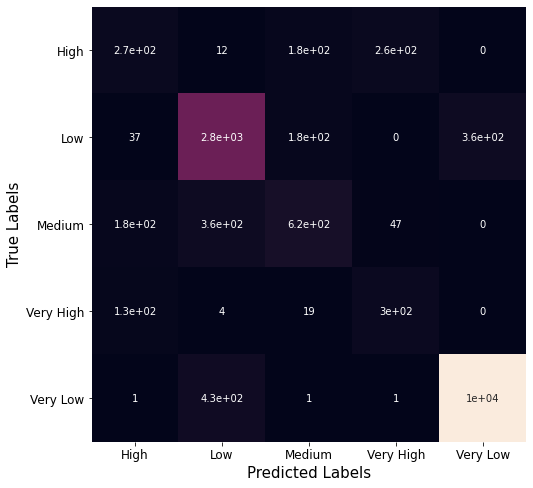

In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

Now try to solve imbalanced problem

In [28]:
# apply random user sampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42,replacement=True)
X_res, y_res = rus.fit_resample(X, y)

In [29]:
y_res.value_counts()

3    1589
2    1589
1    1589
4    1589
0    1589
Name: Label, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3)

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.7103039021758677
Accuracy of test: 0.7084731543624161


In [33]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50       456
           1       0.79      0.82      0.80       467
           2       0.63      0.64      0.64       476
           3       0.68      0.64      0.66       477
           4       0.98      0.90      0.94       508

    accuracy                           0.71      2384
   macro avg       0.71      0.70      0.71      2384
weighted avg       0.72      0.71      0.71      2384



In [34]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.7106936354377349
Recall = 0.7047227438551047
Accuracy = 0.7084731543624161
F1 Score = 0.7070747022210426


In [61]:
# Oversampling using SMOTE

In [35]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(sampling_strategy="minority")
X_smt, y_smt = smt.fit_resample(X, y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_smt,y_smt, test_size=0.3)

In [37]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9099476267875026
Accuracy of test: 0.9108948820104199


In [38]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       698
           1       0.80      0.88      0.84      3380
           2       0.56      0.45      0.50      1199
           3       0.91      0.99      0.95     10250
           4       0.99      0.96      0.97     10577

    accuracy                           0.91     26104
   macro avg       0.65      0.65      0.65     26104
weighted avg       0.89      0.91      0.90     26104



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.651468443573511
Recall = 0.6544404546633088
Accuracy = 0.9108948820104199
F1 Score = 0.6509198189138317


D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

Our dataset includes imbalanced data. There was one label value in more than the number of other labels.
While there were 34663 data with a label value of 4, there were 2000, 3000 data with a label value of 0,2 and 3. This was an example of imbalanced data. First I created model without solving this problem and i get 65% accuracy. Then i tried solve this problem using undersampling and SMOTE operations. Undersampling reached & 71 accuracy, but that wasn't enough for a good model either. But the best one SMOTE operation reached 90% accuracy and that was the good model for us.